## Student Performanace Indicator 

In [2]:
import numpy
import pandas
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Import CSV as Pandas DataFrame

In [4]:
df = pandas.read_csv("data/stud.csv")

### Show top 5 comments

In [6]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Shape of dataset

In [7]:
df.shape

(1000, 8)

### DataFrame Information

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Cheking null/Missing values

In [9]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### Check Duplicate values

In [10]:
df.duplicated().sum()

0

### There is no any duplicated values

### Checking unique values per column

In [11]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### Check Statistics of data set

In [12]:
df.describe()


,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [13]:
print("Categories in gender column: ", end="")
print(df['gender'].unique())
print()

print("Categories in race_ethnicity column: ", end="")
print(df['race_ethnicity'].unique())
print()

print("Categories in parental_level_of_education column: ", end="")
print(df['parental_level_of_education'].unique())
print()

print("Categories in lunch column: ", end="")
print(df['lunch'].unique())
print()

print("Categories in test_preparation_course column: ", end="")
print(df['test_preparation_course'].unique())
print()

Categories in gender column: ['female' 'male']

Categories in race_ethnicity column: ['group B' 'group C' 'group A' 'group D' 'group E']

Categories in parental_level_of_education column: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Categories in lunch column: ['standard' 'free/reduced']

Categories in test_preparation_course column: ['none' 'completed']



In [14]:
# define numerical and categorical column
numerical_columns = [f for f in df.columns if(df[f].dtype != 'O')]
categorical_columns = [f for f in df.columns if(df[f].dtype == 'O')]

In [15]:
numerical_columns

['math_score', 'reading_score', 'writing_score']

In [16]:
categorical_columns

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [17]:
df['gender'].dtype

dtype('O')

In [18]:
df['math_score'].dtype

dtype('int64')

### Adding columns for "Total Score" And "Average of Score"

In [19]:
df['total_score'] = df['math_score'] + df['reading_score']+df['writing_score']
df['average'] = df['total_score']/3

In [20]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [21]:
import seaborn

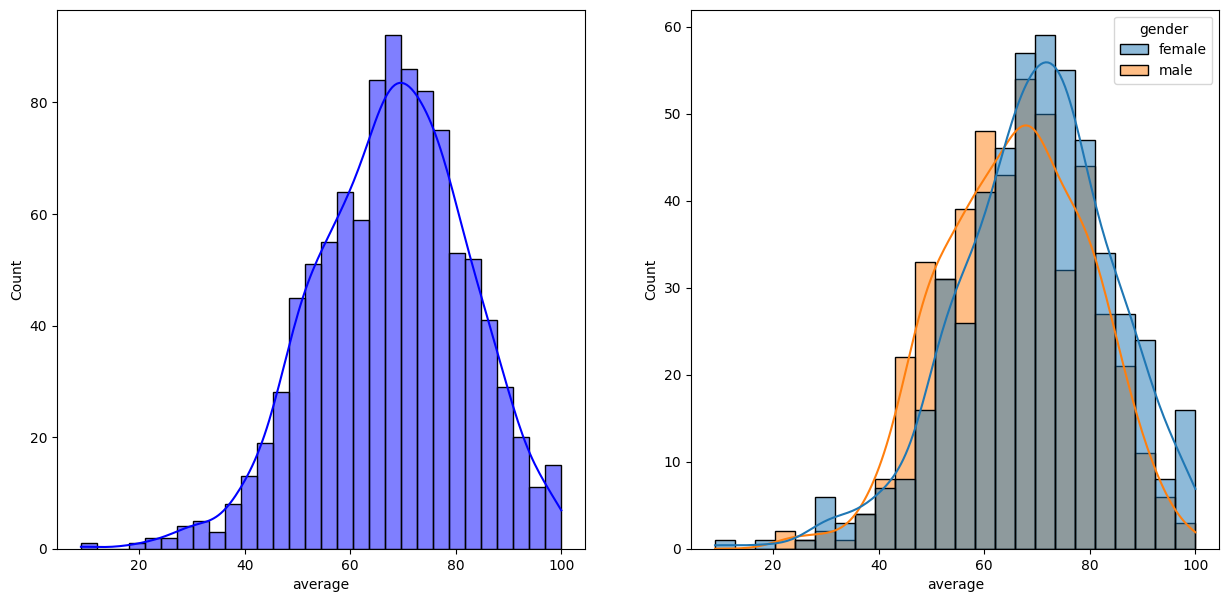

In [22]:
fig, ax = matplotlib.pyplot.subplots(1, 2, figsize=(15,7))
matplotlib.pyplot.subplot(121)
seaborn.histplot(data=df, x='average', bins=30, kde=True, color='b')
matplotlib.pyplot.subplot(122)
seaborn.histplot(data=df, x='average', kde=True, hue='gender')
matplotlib.pyplot.show()

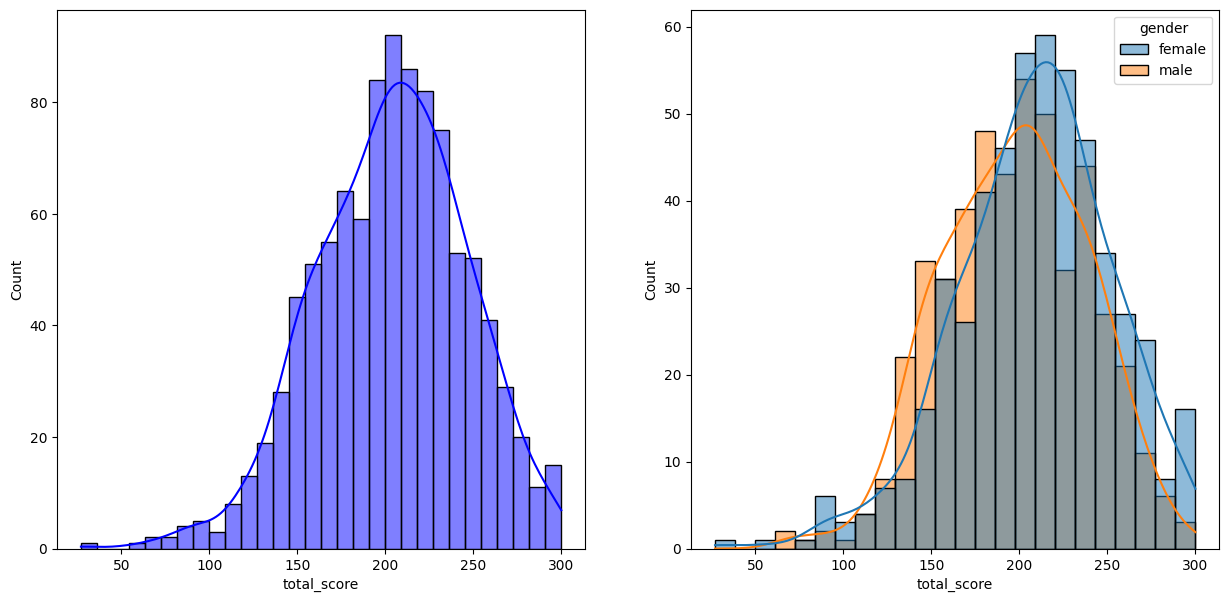

In [24]:
fig, ax = matplotlib.pyplot.subplots(1, 2, figsize=(15,7))
matplotlib.pyplot.subplot(121)
seaborn.histplot(data=df, x='total_score', bins=30, kde=True, color='b')
matplotlib.pyplot.subplot(122)
seaborn.histplot(data=df, x='total_score', kde=True, hue='gender', animated=True)
matplotlib.pyplot.show()

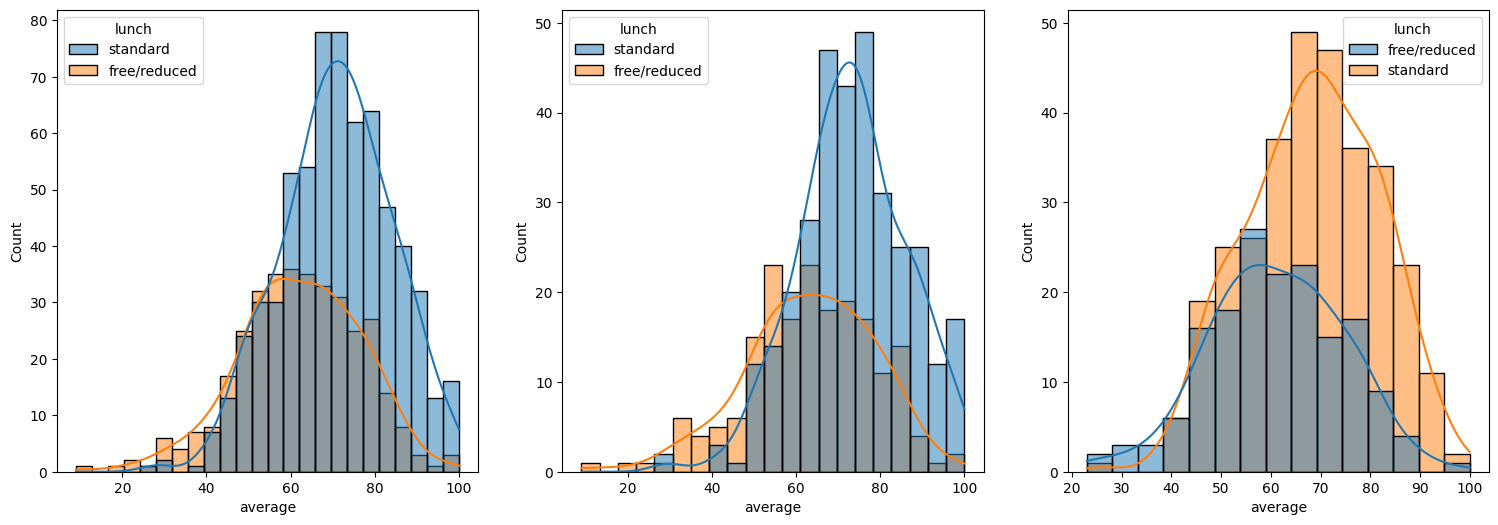

In [26]:
matplotlib.pyplot.subplots(1,3,figsize=(25,6))
matplotlib.pyplot.subplot(141)
seaborn.histplot(data=df,x='average',kde=True,hue='lunch')
matplotlib.pyplot.subplot(142)
seaborn.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
matplotlib.pyplot.subplot(143)
seaborn.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
matplotlib.pyplot.show()

### Insights
1. Standard lunch helps perform well in exams.
2. Standard lunch helps perform well in exams be it a male or a female.

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

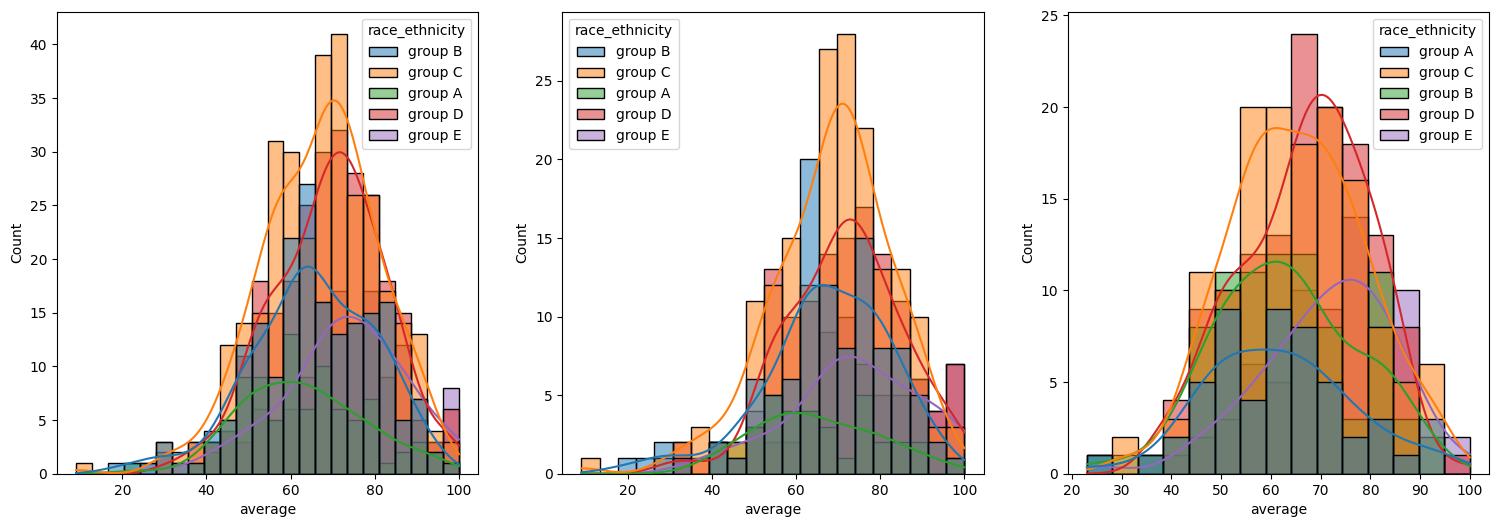

In [32]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

### Maximumum score of students in all three subjects

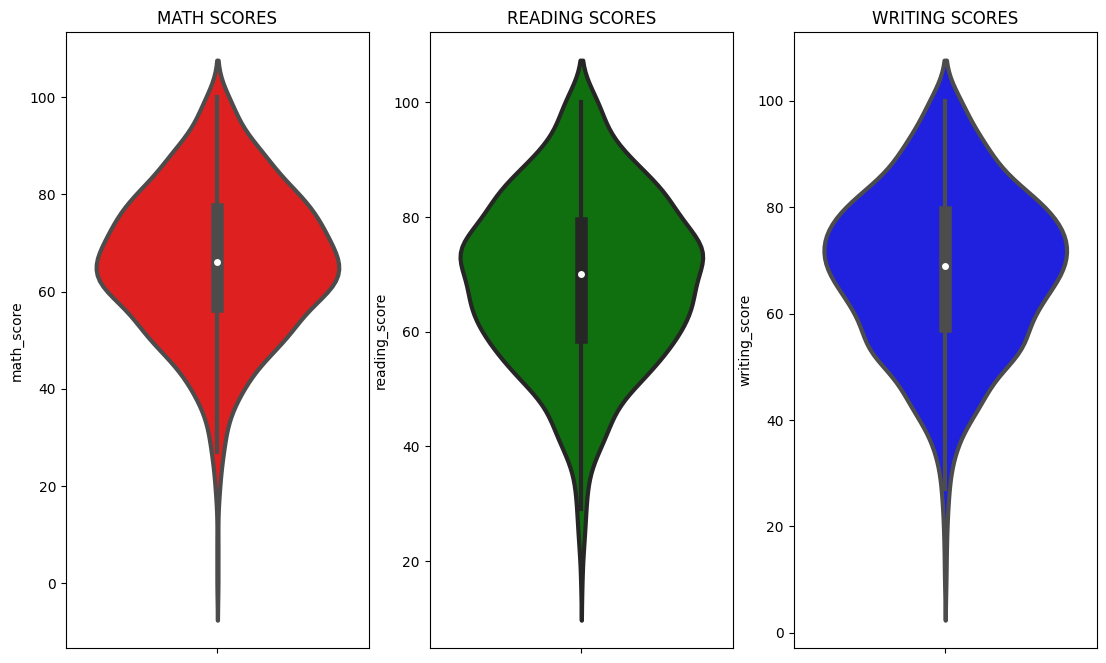

In [33]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

### Insights
From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

In [35]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


### Multivariate analysis using pieplot

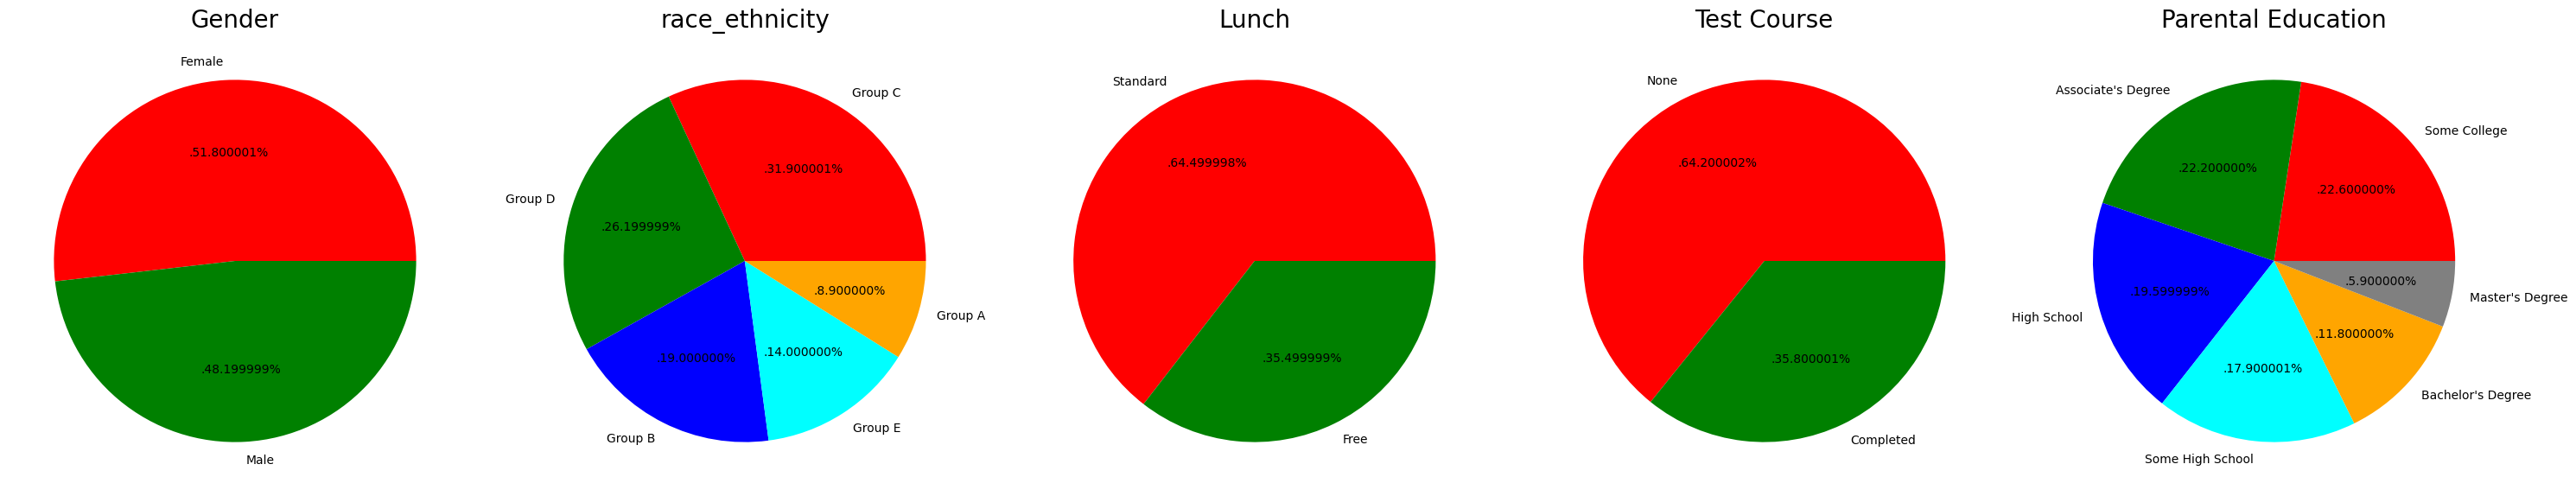

In [36]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('race_ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

### Insights
1. Number of Male and Female students is almost equal
2. Number students are greatest in Group C
3. Number of students who have standard lunch are greater
4. Number of students who have not enrolled in any test preparation course is greater
5. Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

### GENDER COLUMN
1. How is distribution of Gender ?
2. Is gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

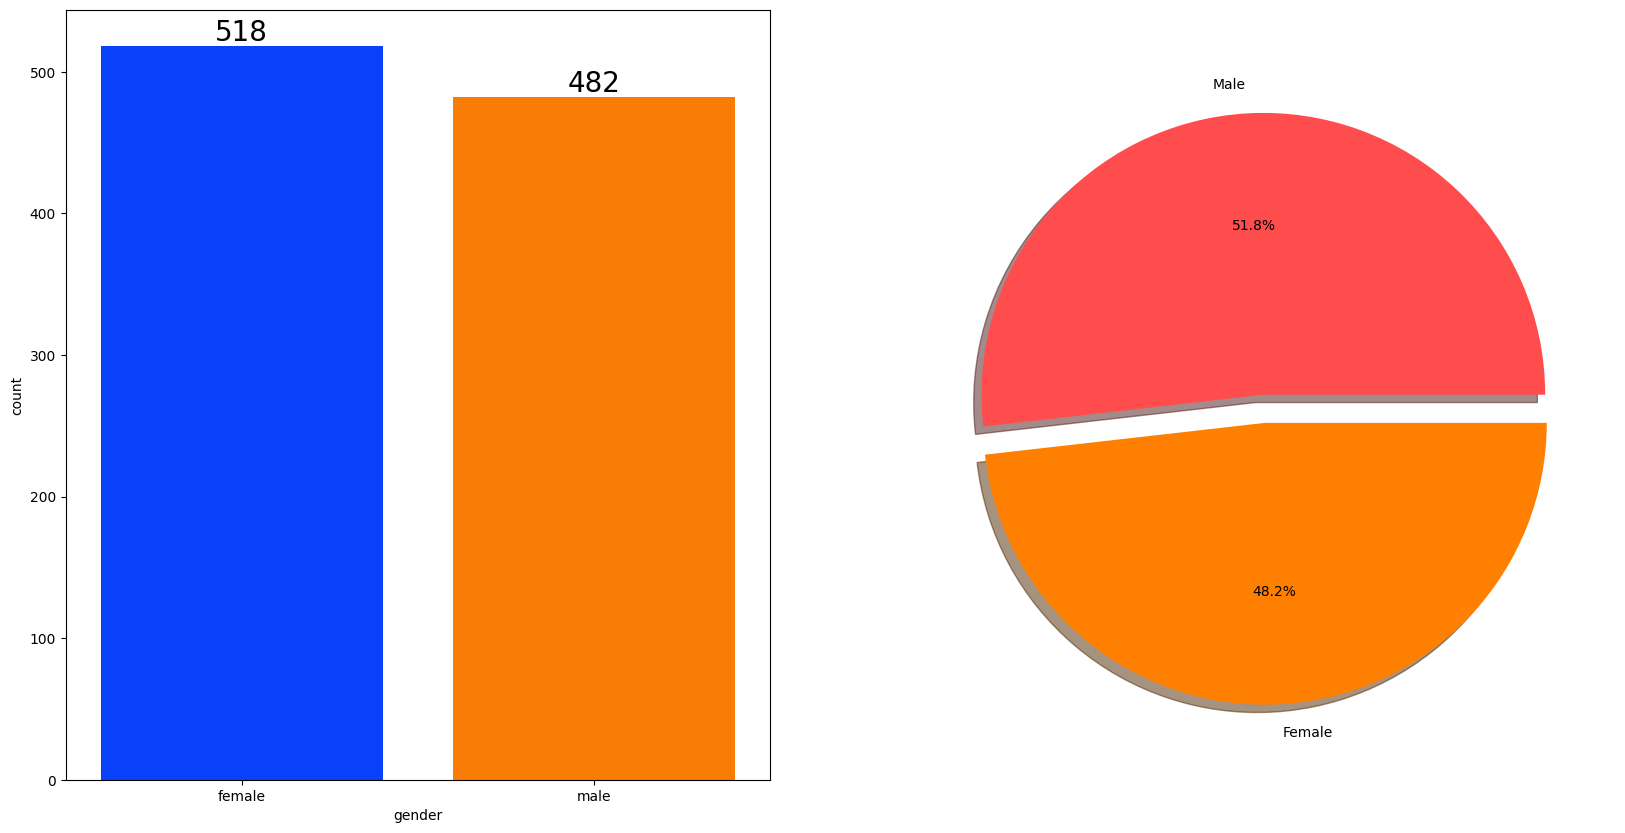

In [37]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

### Insights
1. Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [45]:
gender_group = df.groupby('gender')[['math_score',	'reading_score',	'writing_score']].mean()
gender_group.head()

,math_score,reading_score,writing_score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


####  CHECKING OUTLIERS

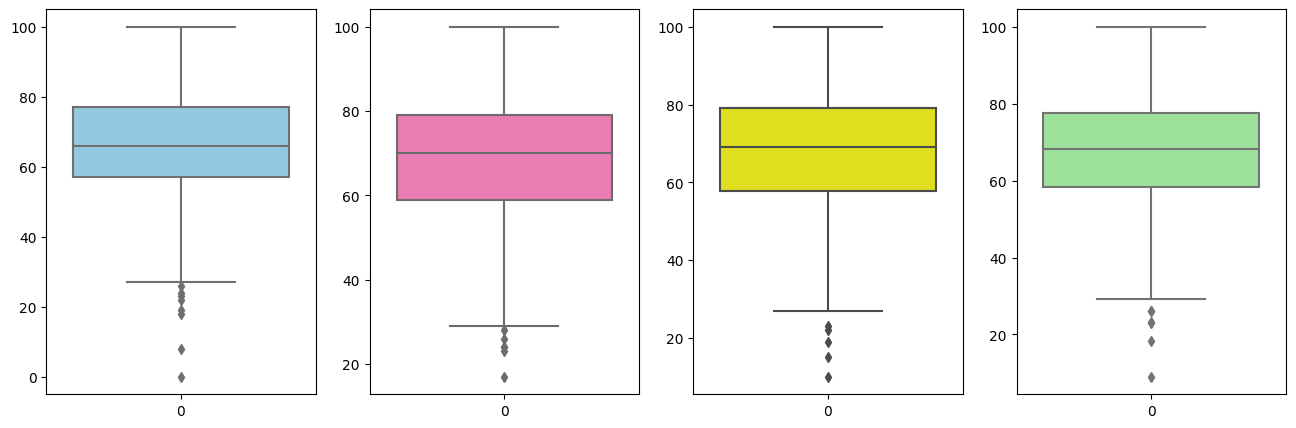

In [47]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

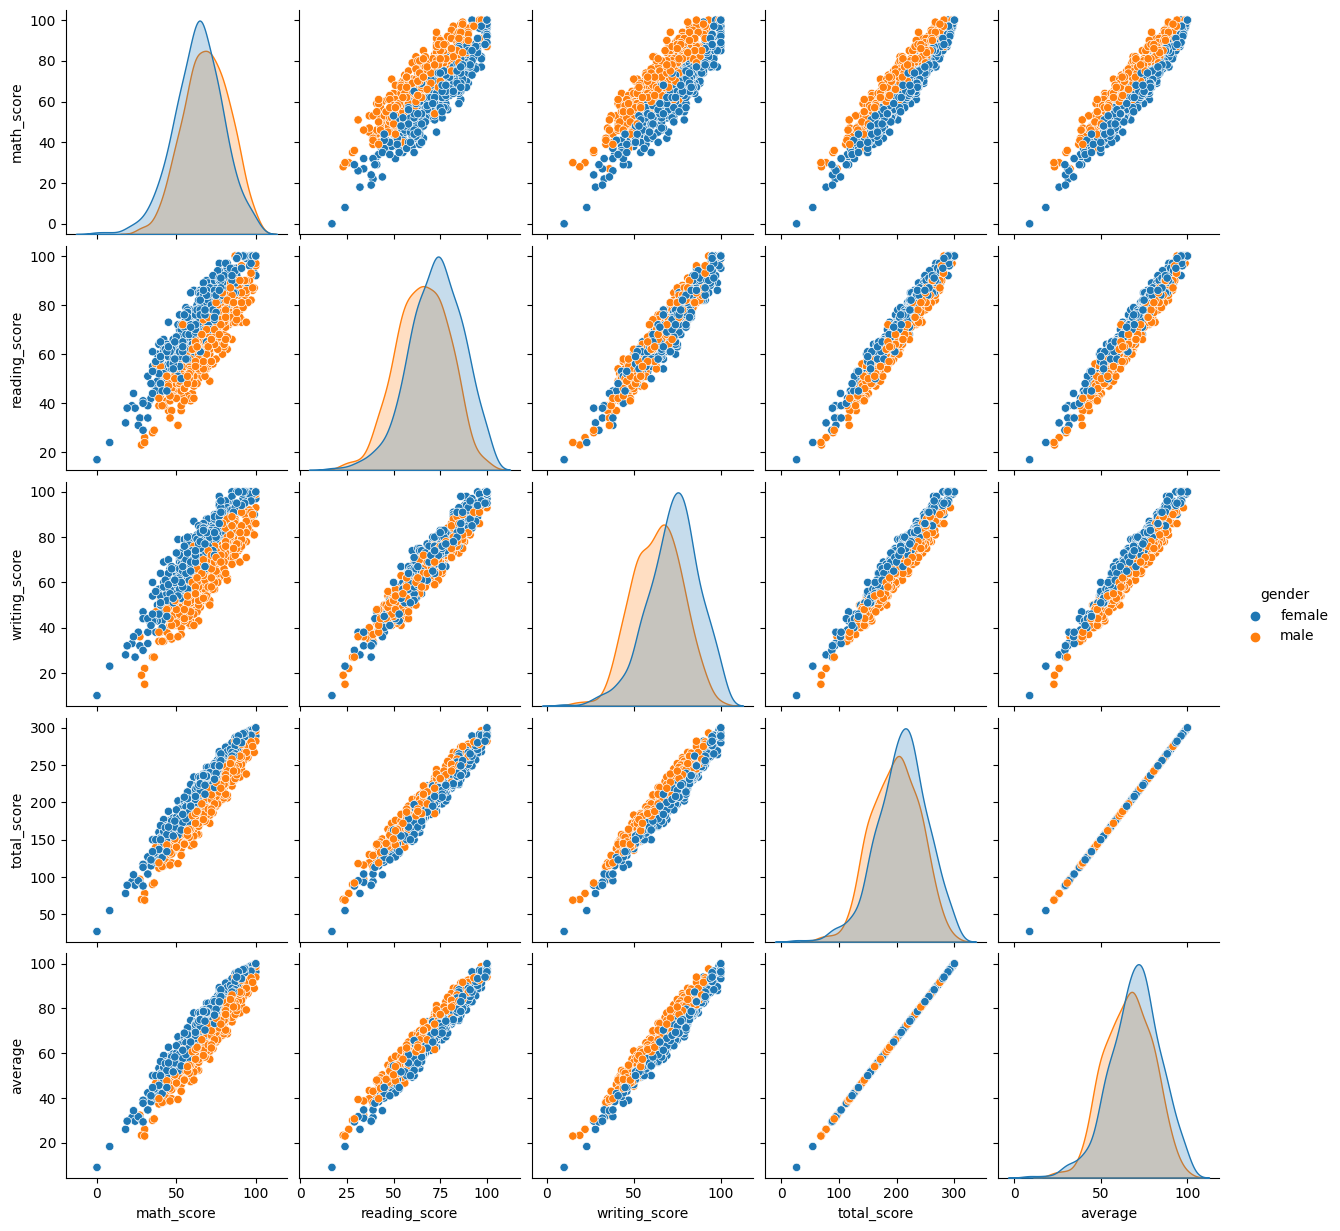

In [48]:
sns.pairplot(df,hue = 'gender')
plt.show()

### Conclusions

1. Student's Performance is related with lunch, race, parental level education
2. Females lead in pass percentage and also are top-scorers
3. Student's Performance is not much related with test preparation course
4. Finishing preparation course is benefitial.